In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

# -----------------------------
# 1️⃣ Prepare the data
# -----------------------------
# Select numeric features
numeric_features = ["bat_landing_to_food", "seconds_after_rat_arrival", "hours_after_sunset"]

# Select categorical features
categorical_features = ["habit", "season"]

# Keep target
target = "risk"

# Drop rows with NaNs in numeric features or target
logistic_data = dataset1_clean[numeric_features + categorical_features + [target]].dropna()

# One-hot encode categorical variables
logistic_data_encoded = pd.get_dummies(logistic_data, columns=categorical_features, drop_first=True)

# Define X and y
X = logistic_data_encoded.drop(columns=[target])
y = logistic_data_encoded[target]

# Add constant term for intercept
X = sm.add_constant(X)

# -----------------------------
# 2️⃣ Fit Logistic Regression
# -----------------------------
logit_model = sm.Logit(y, X).fit()
print("\n----- Logistic Regression Summary -----")
print(logit_model.summary())

# -----------------------------
# 3️⃣ Predict probabilities and classes
# -----------------------------
logistic_data_encoded["risk_prob"] = logit_model.predict(X)
logistic_data_encoded["risk_pred"] = (logistic_data_encoded["risk_prob"] >= 0.5).astype(int)

# -----------------------------
# 4️⃣ Evaluate model performance
# -----------------------------
print("\n----- Confusion Matrix -----")
cm = confusion_matrix(y, logistic_data_encoded["risk_pred"])
print(cm)

print("\n----- Classification Report -----")
print(classification_report(y, logistic_data_encoded["risk_pred"]))

# -----------------------------
# 5️⃣ Interpretation of Results
# -----------------------------
print("\n----- Model Interpretation -----")
print(f"Number of observations: {len(logistic_data_encoded)}")
print(f"Baseline accuracy (predicting all 0s): {(y == 0).mean():.3f}")

# Calculate accuracy manually
accuracy = (logistic_data_encoded["risk_pred"] == y).mean()
print(f"Model accuracy: {accuracy:.3f}")

# Check for significant predictors
p_values = logit_model.pvalues
significant_predictors = p_values[p_values < 0.05]
print(f"\nSignificant predictors (p < 0.05): {len(significant_predictors)}")
for predictor, p_val in significant_predictors.items():
    coef = logit_model.params[predictor]
    print(f"  {predictor}: coefficient = {coef:.3f}, p = {p_val:.4f}")

In [46]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# -----------------------------
# Prepare the data
# -----------------------------
numeric_features = ["bat_landing_to_food", "seconds_after_rat_arrival", "hours_after_sunset"]
categorical_features = ["habit", "season"]
target = "risk"

# Drop rows with NaNs
data = dataset1_clean[numeric_features + categorical_features + [target]].dropna()

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Split X and y
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# -----------------------------
# Fit Logistic Regression (sklearn)
# -----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# -----------------------------
# Predict and evaluate
# -----------------------------
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:,1]

print("----- Confusion Matrix -----")
print(confusion_matrix(y, y_pred))

print("\n----- Classification Report -----")
print(classification_report(y, y_pred))

# -----------------------------
# Feature coefficients
# -----------------------------
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n----- Feature Coefficients -----")
print(coefficients)


----- Confusion Matrix -----
[[394  23]
 [  0 448]]

----- Classification Report -----
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       417
           1       0.95      1.00      0.97       448

    accuracy                           0.97       865
   macro avg       0.98      0.97      0.97       865
weighted avg       0.97      0.97      0.97       865


----- Feature Coefficients -----
                            Feature  Coefficient
53                        habit_rat     3.232920
6                         habit_bat     1.766596
10                  habit_bat_fight     1.670726
7                habit_bat_and_pick     1.497301
9                 habit_bat_and_rat     1.474305
..                              ...          ...
3   habit_.,.,.,.; .,.,.,.; .,.,.,.    -1.001601
33                    habit_no_food    -1.485058
20                       habit_both    -1.794703
41                       habit_pick    -4.423606
26           

In [ ]:
# Pearson Correlation - Dataset 1
print("----- Dataset 1: Pearson Correlation Tests -----")
for col1 in numeric_cols_1:
    for col2 in numeric_cols_1:
        if col1 != col2:
            df_corr = dataset1_clean[[col1, col2]].dropna()
            if len(df_corr) > 1:
                corr, p = pearsonr(df_corr[col1], df_corr[col2])
                print(f"{col1} vs {col2}: r={corr:.3f}, p={p:.3f}")
            else:
                print(f"{col1} vs {col2}: Not enough data")

# Spearman Correlation - Dataset 2
print("\n----- Dataset 2: Spearman Correlation Tests -----")
for col1 in numeric_cols_2:
    for col2 in numeric_cols_2:
        if col1 != col2:
            df_corr = dataset2_30min[[col1, col2]].dropna()
            if len(df_corr) > 1:
                rho, p = spearmanr(df_corr[col1], df_corr[col2])
                print(f"{col1} vs {col2}: rho={rho:.3f}, p={p:.3f}")
            else:
                print(f"{col1} vs {col2}: Not enough data")


----- Dataset 1: Pearson Correlation Tests -----
bat_landing_to_food vs seconds_after_rat_arrival: r=0.026, p=0.439
bat_landing_to_food vs risk: r=0.168, p=0.000
bat_landing_to_food vs reward: r=0.008, p=0.821
bat_landing_to_food vs hours_after_sunset: r=-0.033, p=0.314
seconds_after_rat_arrival vs bat_landing_to_food: r=0.026, p=0.439
seconds_after_rat_arrival vs risk: r=0.022, p=0.513
seconds_after_rat_arrival vs reward: r=-0.024, p=0.480
seconds_after_rat_arrival vs hours_after_sunset: r=0.077, p=0.020
risk vs bat_landing_to_food: r=0.168, p=0.000
risk vs seconds_after_rat_arrival: r=0.022, p=0.513
risk vs reward: r=-0.625, p=0.000
risk vs hours_after_sunset: r=-0.059, p=0.076
reward vs bat_landing_to_food: r=0.008, p=0.821
reward vs seconds_after_rat_arrival: r=-0.024, p=0.480
reward vs risk: r=-0.625, p=0.000
reward vs hours_after_sunset: r=0.052, p=0.115
hours_after_sunset vs bat_landing_to_food: r=-0.033, p=0.314
hours_after_sunset vs seconds_after_rat_arrival: r=0.077, p=0.020


----- Dataset 1 Summary Statistics -----
                           count        mean      median     std_dev  \
bat_landing_to_food        906.0   11.720544    4.000000   27.658777   
seconds_after_rat_arrival  906.0  282.786976  206.000000  241.092545   
risk                       906.0    0.494481    0.000000    0.500246   
reward                     906.0    0.534216    1.000000    0.499103   
hours_after_sunset         906.0    5.532579    5.627083    2.415383   

                                min         max  
bat_landing_to_food        0.010238  443.000000  
seconds_after_rat_arrival  0.000000  949.000000  
risk                       0.000000    1.000000  
reward                     0.000000    1.000000  
hours_after_sunset        -0.261667   12.091944  

----- Dataset 2 Summary Statistics -----
                     count       mean     median    std_dev  min    max
hours_after_sunset  2123.0   5.265426   5.000000   4.076188 -2.0   13.5
bat_landing_number  2123.0  32.083373  2

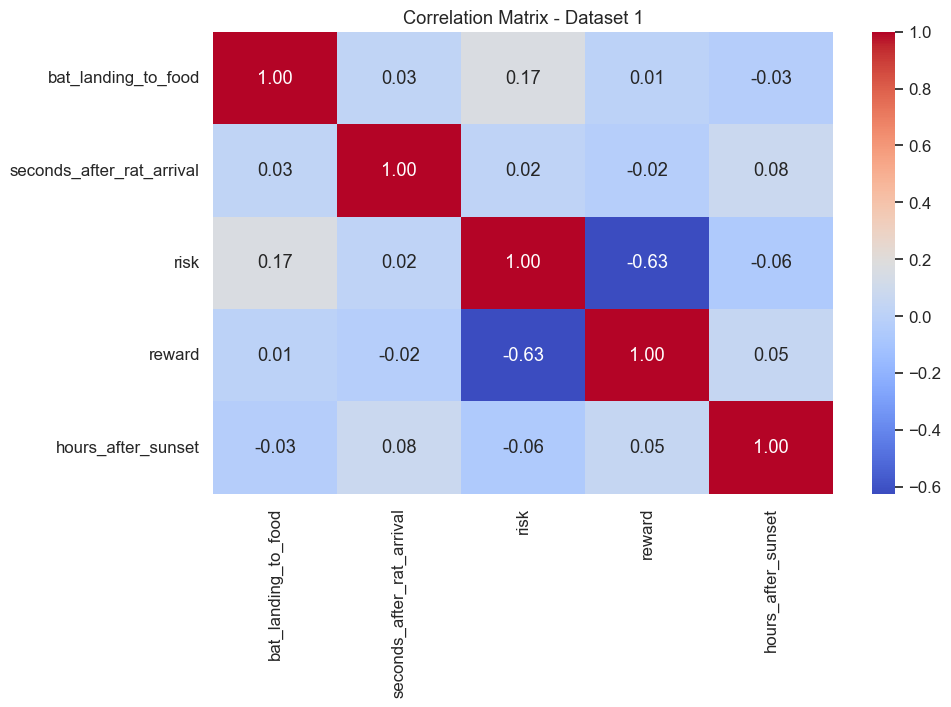

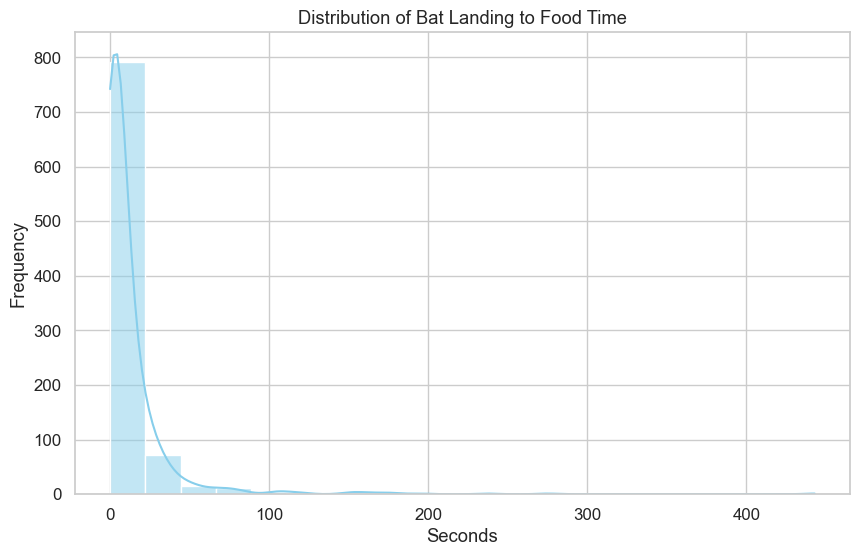

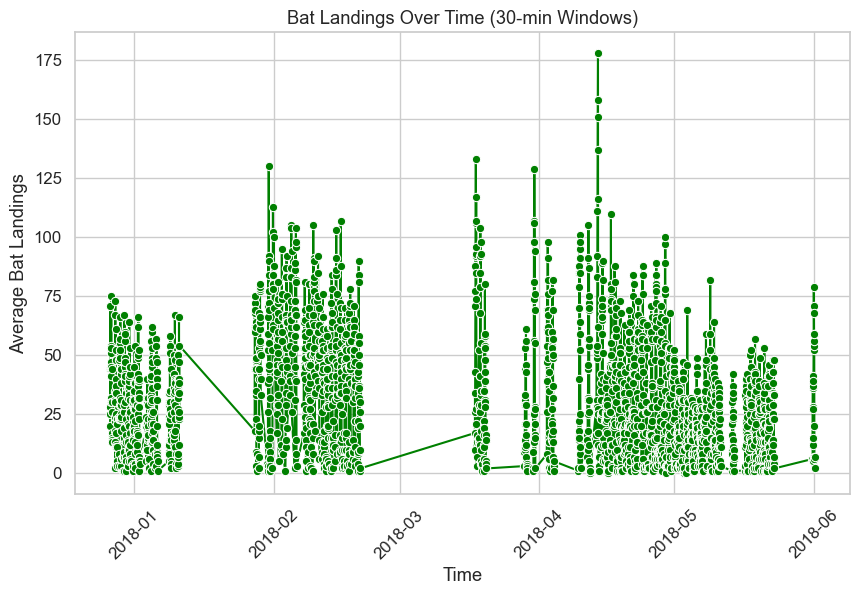

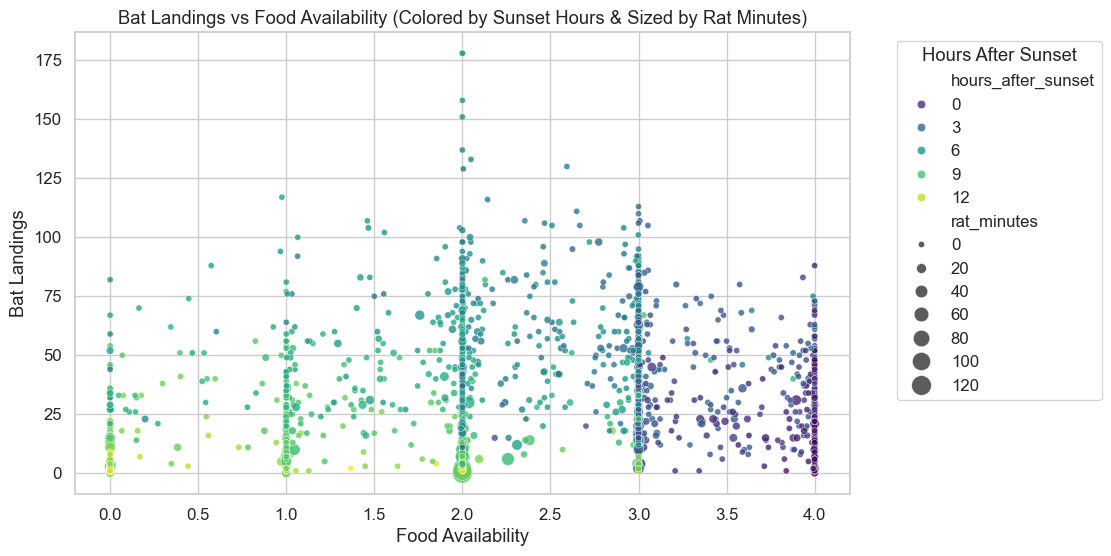

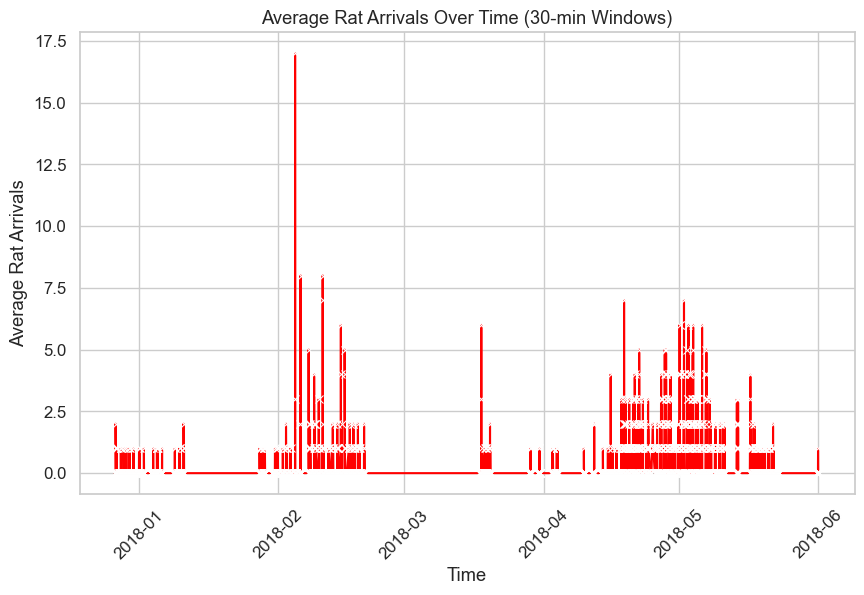

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Set visualization style ----
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10,6)

# ---- Helper function for summary statistics ----
def summary_stats(df, numeric_cols):
    summary = df[numeric_cols].agg(['count','mean','median','std','min','max']).T
    summary = summary.rename(columns={'std':'std_dev'})
    return summary

# ---- Dataset 1: Numeric columns ----
numeric_cols_1 = ["bat_landing_to_food", "seconds_after_rat_arrival", "risk", "reward", "hours_after_sunset"]
print("----- Dataset 1 Summary Statistics -----")
print(summary_stats(dataset1_clean, numeric_cols_1))

# ---- Dataset 2: Numeric columns ----
numeric_cols_2 = ["hours_after_sunset", "bat_landing_number", "food_availability", "rat_minutes", "rat_arrival_number"]
print("\n----- Dataset 2 Summary Statistics -----")
print(summary_stats(dataset2_30min, numeric_cols_2))

# ---- 1️⃣ Correlation Matrix: Dataset 1 ----
corr1 = dataset1_clean[numeric_cols_1].corr()
plt.figure()
sns.heatmap(corr1, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Dataset 1")
plt.show()

# ---- 2️⃣ Histogram: Bat Landing to Food Time ----
plt.figure()
sns.histplot(dataset1_clean["bat_landing_to_food"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Bat Landing to Food Time")
plt.xlabel("Seconds")
plt.ylabel("Frequency")
plt.show()

# ---- 5️⃣ Time Series: Bat Landings (Dataset 2) ----
plt.figure()
sns.lineplot(x="time", y="bat_landing_number", data=dataset2_30min, marker="o", color="green")
plt.title("Bat Landings Over Time (30-min Windows)")
plt.xlabel("Time")
plt.ylabel("Average Bat Landings")
plt.xticks(rotation=45)
plt.show()

# ---- 6️⃣ Scatterplot: Food Availability vs Bat Landings ----
plt.figure()
sns.scatterplot(
    x="food_availability", 
    y="bat_landing_number", 
    data=dataset2_30min, 
    hue="hours_after_sunset", 
    palette="viridis", 
    size="rat_minutes", 
    sizes=(20,200),
    alpha=0.8
)
plt.title("Bat Landings vs Food Availability (Colored by Sunset Hours & Sized by Rat Minutes)")
plt.xlabel("Food Availability")
plt.ylabel("Bat Landings")
plt.legend(title="Hours After Sunset", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# ---- 7️⃣ Lineplot: Rat Arrivals Over Time ----
plt.figure()
sns.lineplot(x="time", y="rat_arrival_number", data=dataset2_30min, color="red", marker="x")
plt.title("Average Rat Arrivals Over Time (30-min Windows)")
plt.xlabel("Time")
plt.ylabel("Average Rat Arrivals")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import re
import os

# ---- Create "cleaned_data" folder ----
output_folder = "cleaned_data"
os.makedirs(output_folder, exist_ok=True)

# ---- Check current working directory ----
print("📂 Current working directory:", os.getcwd())

# ---- Load datasets ----
dataset1 = pd.read_csv("dataset1.csv")
dataset2 = pd.read_csv("dataset2.csv")

# ---- Clean column names ----
dataset1.columns = dataset1.columns.str.strip().str.lower().str.replace(" ", "_")
dataset2.columns = dataset2.columns.str.strip().str.lower().str.replace(" ", "_")

# ---- Convert date/time columns ----
dataset1["start_time"] = pd.to_datetime(dataset1["start_time"], errors="coerce", dayfirst=True)
dataset1["rat_period_start"] = pd.to_datetime(dataset1["rat_period_start"], errors="coerce", dayfirst=True)
dataset1["rat_period_end"] = pd.to_datetime(dataset1["rat_period_end"], errors="coerce", dayfirst=True)
dataset1["sunset_time"] = pd.to_datetime(dataset1["sunset_time"], errors="coerce", dayfirst=True)

dataset2["time"] = pd.to_datetime(dataset2["time"], errors="coerce", dayfirst=True)

# ---- Dataset 1 Cleaning ----
dataset1_clean = dataset1[[
    "start_time", "bat_landing_to_food", "habit",
    "seconds_after_rat_arrival", "risk", "reward",
    "hours_after_sunset", "season"
]].copy()

# Remove numeric values from 'habit' column
dataset1_clean["habit"] = dataset1_clean["habit"].apply(
    lambda x: re.sub(r'\d+', '', x).strip() if isinstance(x, str) else x
)

# Drop duplicates
dataset1_clean = dataset1_clean.drop_duplicates().reset_index(drop=True)

# ---- Dataset 2 Cleaning ----
dataset2_clean = dataset2[[
    "time", "hours_after_sunset", "bat_landing_number",
    "food_availability", "rat_minutes", "rat_arrival_number"
]].copy()

# Drop duplicates
dataset2_clean = dataset2_clean.drop_duplicates().reset_index(drop=True)

# Resample into 30-minute observation windows
dataset2_30min = dataset2_clean.set_index("time").resample("30min").agg({
    "hours_after_sunset": "mean",
    "bat_landing_number": "mean",
    "food_availability": "mean",
    "rat_minutes": "sum",            # sum since it's additive
    "rat_arrival_number": "mean"     # mean arrivals within window
}).reset_index()

# ---- Save cleaned datasets ----
dataset1_clean.to_csv(os.path.join(output_folder, "dataset1_clean.csv"), index=False)
dataset2_clean.to_csv(os.path.join(output_folder, "dataset2_clean.csv"), index=False)
dataset2_30min.to_csv(os.path.join(output_folder, "dataset2_30min.csv"), index=False)

# ---- Preview cleaned data ----
print("\n✅ Dataset 1 (Cleaned):", dataset1_clean.shape)
print(dataset1_clean.head())

print("\n✅ Dataset 2 (Cleaned):", dataset2_clean.shape)
print(dataset2_clean.head())

print("\n✅ Dataset 2 (30-min windows):", dataset2_30min.shape)
print(dataset2_30min.head())


📂 Current working directory: /Users/bibekkhakural/data science

✅ Dataset 1 (Cleaned): (906, 8)
           start_time  bat_landing_to_food habit  seconds_after_rat_arrival  \
0 2017-12-30 18:37:00            16.000000   rat                        108   
1 2017-12-30 19:51:00             0.074016  fast                         17   
2 2017-12-30 19:51:00             4.000000  fast                         41   
3 2017-12-30 19:52:00            10.000000   rat                        111   
4 2017-12-30 19:54:00            15.000000   rat                        194   

   risk  reward  hours_after_sunset  season  
0     1       0            1.870833       0  
1     0       1            3.100833       0  
2     0       1            3.107500       0  
3     1       0            3.126944       0  
4     1       0            3.150000       0  

✅ Dataset 2 (Cleaned): (2123, 6)
                 time  hours_after_sunset  bat_landing_number  \
0 2017-12-26 16:13:00                -0.5             

In [ ]:
import os

# Path where you want to save
output_folder = "/Users/bibekkhakural/cleaned_data"

# Create folder if it doesn’t exist
os.makedirs(output_folder, exist_ok=True)

# Save cleaned datasets
dataset1_clean.to_csv(os.path.join(output_folder, "dataset1_clean.csv"), index=False)
dataset2_clean.to_csv(os.path.join(output_folder, "dataset2_clean.csv"), index=False)
dataset2_30min.to_csv(os.path.join(output_folder, "dataset2_30min.csv"), index=False)

print("✅ Cleaned datasets saved in:", output_folder)


✅ Cleaned datasets saved in: /Users/bibekkhakural/cleaned_data
